<a href="https://colab.research.google.com/github/Asif-Mustafa-svg/project/blob/main/Big_query.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
auth.authenticate_user()
from google.cloud import bigquery
project_id = "alert-operation-464810-e1"  # Replace with your project ID
client = bigquery.Client(project=project_id)
query = """
    SELECT *
    FROM `alert-operation-464810-e1.Churn_analysis.Telco_churn_dataset`
    WHERE Country = 'United States'
    LIMIT 10
"""
query_job = client.query(query)
results = query_job.result()



In [ ]:
datasets = list(client.list_datasets())
print("Available Datasets:")
for dataset in datasets:
    print(f"- {dataset.dataset_id}")


Available Datasets:
- Churn_analysis
- employee_data


In [ ]:

tables = list(client.list_tables("alert-operation-464810-e1.Churn_analysis"))

print("Tables in Dataset 'Churn_analysis':")
for table in tables:
    print(f"- {table.table_id}")


Tables in Dataset 'Churn_analysis':
- Telco_churn_dataset


In [ ]:
table_id = "Telco_churn_dataset"  # Update this if the name is different
full_table_id = f"alert-operation-464810-e1.Churn_analysis.{table_id}"

table = client.get_table(full_table_id)
print(f" Schema for table '{table_id}':")

for field in table.schema:
    print(f"- {field.name} ({field.field_type})")


 Schema for table 'Telco_churn_dataset':
- CustomerID (STRING)
- Count (INTEGER)
- Country (STRING)
- State (STRING)
- City (STRING)
- Zip Code (INTEGER)
- Lat Long (STRING)
- Latitude (FLOAT)
- Longitude (FLOAT)
- Gender (STRING)
- Senior Citizen (BOOLEAN)
- Partner (BOOLEAN)
- Dependents (BOOLEAN)
- Tenure Months (INTEGER)
- Phone Service (BOOLEAN)
- Multiple Lines (STRING)
- Internet Service (STRING)
- Online Security (STRING)
- Online Backup (STRING)
- Device Protection (STRING)
- Tech Support (STRING)
- Streaming TV (STRING)
- Streaming Movies (STRING)
- Contract (STRING)
- Paperless Billing (BOOLEAN)
- Payment Method (STRING)
- Monthly Charges (FLOAT)
- Total Charges (STRING)
- Churn Label (BOOLEAN)
- Churn Value (INTEGER)
- Churn Score (INTEGER)
- CLTV (INTEGER)
- Churn Reason (STRING)


In [ ]:
query = f"SELECT * FROM `{full_table_id}`"
df = client.query(query).to_dataframe()
df.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,9426-SXNHE,1,United States,California,Orleans,95556,"41.269521, -123.546958",41.269521,-123.546958,Female,...,Month-to-month,False,Bank transfer (automatic),18.75,53.15,False,0,23,5355,None
1,3806-YAZOV,1,United States,California,Lagunitas,94938,"38.021772, -122.691744",38.021772,-122.691744,Female,...,Month-to-month,False,Mailed check,18.80,56,False,0,67,3010,None
2,3387-PLKUI,1,United States,California,San Jose,95119,"37.233226, -121.78809",37.233226,-121.788090,Female,...,Month-to-month,False,Mailed check,18.80,251.25,False,0,71,2333,None
3,9318-NKNFC,1,United States,California,Twain,95984,"40.022184, -121.062384",40.022184,-121.062384,Male,...,Month-to-month,True,Mailed check,18.85,18.85,True,1,90,4132,Service dissatisfaction
4,8992-CEUEN,1,United States,California,Arnold,95223,"38.32153, -120.236358",38.321530,-120.236358,Female,...,Month-to-month,False,Electronic check,18.85,18.85,False,0,37,5084,None


In [ ]:
df.describe()


,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.0,7043.000000,7043.000000,7043.0,7043.000000,7043.0,7043.0,7043.0
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.26537,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.0,32.555828,-124.301372,0.0,18.250000,0.0,5.0,2003.0
25%,1.0,92102.0,34.030915,-121.815412,9.0,35.500000,0.0,40.0,3469.0
50%,1.0,93552.0,36.391777,-119.730885,29.0,70.350000,0.0,61.0,4527.0
75%,1.0,95351.0,38.224869,-118.043237,55.0,89.850000,1.0,75.0,5380.5
max,1.0,96161.0,41.962127,-114.192901,72.0,118.750000,1.0,100.0,6500.0


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0


In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column)


CustomerID
Country
State
City
Lat Long
Gender
Multiple Lines
Internet Service
Online Security
Online Backup
Device Protection
Tech Support
Streaming TV
Streaming Movies
Contract
Payment Method
Total Charges
Churn Reason


In [ ]:
for column in df.columns:
    if df[column].dtype == 'float':
        print(column)

Latitude
Longitude
Monthly Charges


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   Int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   Int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   boolean
 11  Partner            7043 non-null   boolean
 12  Dependents         7043 non-null   boolean
 13  Tenure Months      7043 non-null   Int64  
 14  Phone Service      7043 non-null   boolean
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   Int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   Int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   boolean
 11  Partner            7043 non-null   boolean
 12  Dependents         7043 non-null   boolean
 13  Tenure Months      7043 non-null   Int64  
 14  Phone Service      7043 non-null   boolean
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,9426-SXNHE,1,United States,California,Orleans,95556,"41.269521, -123.546958",41.269521,-123.546958,Female,...,Month-to-month,False,Bank transfer (automatic),18.75,53.15,False,0,23,5355,None
1,3806-YAZOV,1,United States,California,Lagunitas,94938,"38.021772, -122.691744",38.021772,-122.691744,Female,...,Month-to-month,False,Mailed check,18.80,56,False,0,67,3010,None
2,3387-PLKUI,1,United States,California,San Jose,95119,"37.233226, -121.78809",37.233226,-121.788090,Female,...,Month-to-month,False,Mailed check,18.80,251.25,False,0,71,2333,None
3,9318-NKNFC,1,United States,California,Twain,95984,"40.022184, -121.062384",40.022184,-121.062384,Male,...,Month-to-month,True,Mailed check,18.85,18.85,True,1,90,4132,Service dissatisfaction
4,8992-CEUEN,1,United States,California,Arnold,95223,"38.32153, -120.236358",38.321530,-120.236358,Female,...,Month-to-month,False,Electronic check,18.85,18.85,False,0,37,5084,None


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0


In [ ]:
!pip install pycaret

In [ ]:
###Churn_reason_analysis_through_NLP_approach

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from sklearn.preprocessing import LabelEncoder
from pycaret.classification import *



In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
df['Churn Reason'] = df['Churn Reason'].fillna('Unknown')
df['Churn Reason'] = df['Churn Reason'].str.lower()


In [ ]:
# 1. TF-IDF vectorization
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['Churn Reason'])

# 2. Topic Modeling with NMF
nmf = NMF(n_components=10, random_state=42)
W = nmf.fit_transform(X)
H = nmf.components_

# Show top words for each topic
feature_names = tfidf.get_feature_names_out()
for topic_idx, topic in enumerate(H):
    top_words = [feature_names[i] for i in topic.argsort()[:-6:-1]]
    print(f"Topic {topic_idx+1}: {', '.join(top_words)}")


Topic 1: unknown, website, distance, lack, know
Topic 2: speeds, higher, download, offered, competitor
Topic 3: person, support, attitude, poor, expertise
Topic 4: better, competitor, offer, devices, offered
Topic 5: service, provider, attitude, website, self
Topic 6: don, know, lack, charges, website
Topic 7: dissatisfaction, product, service, charges, long
Topic 8: data, offered, competitor, extra, charges
Topic 9: network, reliability, moved, lack, self
Topic 10: high, price, moved, lack, self


In [ ]:
# Bag of Words (Count Vectorizer)
vectorizer = CountVectorizer(stop_words='english')
X_bow = vectorizer.fit_transform(df['Churn Reason'])

# Convert to DataFrame for inspection
bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())
print("\nBag of Words Matrix:\n", bow_df.head())



Bag of Words Matrix:
    affordable  attitude  better  charges  competitor  data  deceased  devices  \
0           0         0       0        0           0     0         0        0   
1           0         0       0        0           0     0         0        0   
2           0         0       0        0           0     0         0        0   
3           0         0       0        0           0     0         0        0   
4           0         0       0        0           0     0         0        0   

   dissatisfaction  distance  ...  reliability  self  service  services  \
0                0         0  ...            0     0        0         0   
1                0         0  ...            0     0        0         0   
2                0         0  ...            0     0        0         0   
3                1         0  ...            0     0        1         0   
4                0         0  ...            0     0        0         0   

   speed  speeds  support  unknown  upl


Top Words:
 unknown       5174
competitor     621
offered        351
attitude       327
service        312
better         270
download       233
support        231
data           219
person         192
dtype: int64


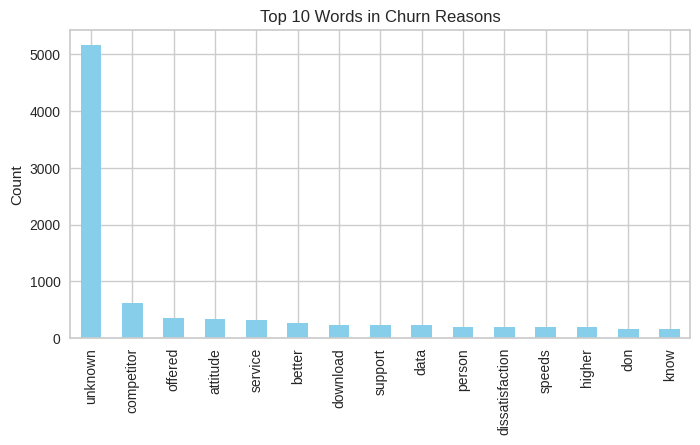

In [ ]:
# Sum word counts
word_counts = bow_df.sum(axis=0).sort_values(ascending=False)

print("\nTop Words:\n", word_counts.head(10))

# Bar chart
plt.figure(figsize=(8,4))
word_counts.head(15).plot(kind='bar', color='skyblue')
plt.title("Top 10 Words in Churn Reasons")
plt.ylabel("Count")
plt.show()


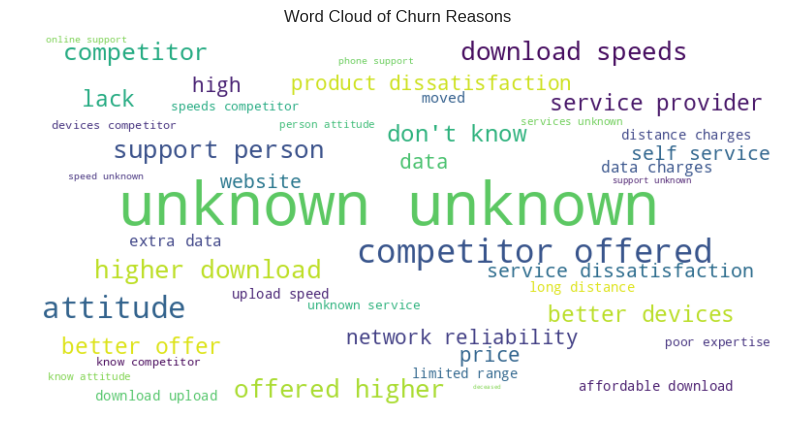

In [ ]:
# Join all churn reasons into one string
text_all = " ".join(df['Churn Reason'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=set(vectorizer.get_stop_words())).generate(text_all)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Churn Reasons")
plt.show()


In [ ]:
# Assign topics to each document
df['Topic'] = W.argmax(axis=1) + 1  # +1 to make topics start at 1

# Show top words for each topic (TF-IDF)
feature_names = tfidf.get_feature_names_out()
for topic_idx, topic in enumerate(H):
    top_words = [feature_names[i] for i in topic.argsort()[:-6:-1]]
    print(f"Topic {topic_idx+1}: {', '.join(top_words)}")

# --- NEW: Per-topic Bag of Words ---
print("\n=== Per-Topic Bag of Words ===")
vectorizer_bow = CountVectorizer(stop_words='english')

for topic_num in sorted(df['Topic'].unique()):
    topic_text = df[df['Topic'] == topic_num]['Churn Reason']
    X_bow = vectorizer_bow.fit_transform(topic_text)
    bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer_bow.get_feature_names_out())
    top_words = bow_df.sum(axis=0).sort_values(ascending=False).head(5)
    print(f"\nTopic {topic_num} - Top Words (Bag of Words):")
    print(top_words)

Topic 1: unknown, website, distance, lack, know
Topic 2: speeds, higher, download, offered, competitor
Topic 3: person, support, attitude, poor, expertise
Topic 4: better, competitor, offer, devices, offered
Topic 5: service, provider, attitude, website, self
Topic 6: don, know, lack, charges, website
Topic 7: dissatisfaction, product, service, charges, long
Topic 8: data, offered, competitor, extra, charges
Topic 9: network, reliability, moved, lack, self
Topic 10: high, price, moved, lack, self

=== Per-Topic Bag of Words ===

Topic 1 - Top Words (Bag of Words):
unknown    5174
dtype: int64

Topic 2 - Top Words (Bag of Words):
download      233
competitor    189
higher        189
offered       189
speeds        189
dtype: int64

Topic 3 - Top Words (Bag of Words):
support      231
attitude     192
person       192
expertise     39
poor          39
dtype: int64

Topic 4 - Top Words (Bag of Words):
better        270
competitor    270
offer         140
devices       130
dtype: int64

To

In [ ]:
# Fill NaN
df['Churn Reason'] = df['Churn Reason'].fillna("Unknown")

# Step 1: TF-IDF + NMF for topics
tfidf = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf.fit_transform(df['Churn Reason'])

nmf = NMF(n_components=10, random_state=42)
W = nmf.fit_transform(X_tfidf)
df['Topic'] = W.argmax(axis=1) + 1

# Step 2: Lexicon-based Sentiment Score
sid = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Churn Reason'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Step 3: Optional Topic → Satisfaction Mapping (0–100 scale)
topic_score_map = {
    1: 40, 2: 30, 3: 20, 4: 25, 5: 35,
    6: 15, 7: 20, 8: 25, 9: 30, 10: 25
}
df['Satisfaction_Score'] = df['Topic'].map(topic_score_map)

# Step 4: Combined Final Score (weighted average example)
df['Final_Satisfaction'] = (df['Satisfaction_Score'] / 100) * (1 + df['Sentiment'])

print(df[['Churn Reason', 'Topic', 'Sentiment', 'Satisfaction_Score', 'Final_Satisfaction']].head())


              Churn Reason  Topic  Sentiment  Satisfaction_Score  \
0                  unknown      1     0.0000                  40   
1                  unknown      1     0.0000                  40   
2                  unknown      1     0.0000                  40   
3  service dissatisfaction      7    -0.4939                  20   
4                  unknown      1     0.0000                  40   

   Final_Satisfaction  
0             0.40000  
1             0.40000  
2             0.40000  
3             0.10122  
4             0.40000  


In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [ ]:
mapping = {
    'Month-to-month': 1,
    'One year':12,
    'Two year': 24
}

df["Contract"] = df["Contract"].map(mapping).fillna('Unknown')

In [ ]:
mapping = {
    'False': 0,
    'True':1
}

df["Churn Label"]= df["Churn Label"].map(mapping).fillna('Unknown')

In [ ]:
mapping = {
    'Female': 1,
    'Male':2
}

df["Gender"]= df["Gender"].map(mapping).fillna('Unknown')

In [ ]:
df['Payment Method'].unique()

array(['Bank transfer (automatic)', 'Mailed check', 'Electronic check',
       'Credit card (automatic)'], dtype=object)

In [ ]:
mapping = {
    'Bank transfer (automatic)': 1,
    'Mailed check': 2,
    'Electronic check': 3,
    'Credit card (automatic)': 4

}

# Map values
df['Payment Method'] = df['Payment Method'].map(mapping)

In [ ]:
df.info()

In [ ]:
# Assuming df is your DataFrame
# Example: df = pd.read_csv("your_file.csv")

label_encoder = LabelEncoder()

# Loop through all object-type columns and encode
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

print(df.head())


   CustomerID  Count  Country  State  City  Zip Code  Lat Long   Latitude  \
0        6632      1        0      0   723     95556      1619  41.269521   
1        2682      1        0      0   507     94938      1164  38.021772   
2        2362      1        0      0   878     95119       892  37.233226   
3        6560      1        0      0  1036     95984      1515  40.022184   
4        6350      1        0      0    39     95223      1229  38.321530   

    Longitude  Gender  ...  Total Charges  Churn Label  Churn Value  \
0 -123.546958       1  ...           4431            0            0   
1 -122.691744       1  ...           4634            0            0   
2 -121.788090       1  ...           2165            0            0   
3 -121.062384       2  ...           1343            0            1   
4 -120.236358       1  ...           1343            0            0   

   Churn Score  CLTV  Churn Reason  Topic  Sentiment  Satisfaction_Score  \
0           23  5355            20

In [ ]:
from pycaret.classification import setup, compare_models, save_model, plot_model, evaluate_model
import pandas as pd

In [ ]:
from pycaret.classification import setup, compare_models, save_model, tune_model, evaluate_model
# Set up PyCaret classification environment
clf_setup = setup(
    data=df,
    target='Churn Value',   # your target column
    session_id=123,         # for reproducibility
    normalize=True,         # optional: normalize features
    categorical_features=df.select_dtypes(include=['object', 'bool']).columns.tolist(),  # ensure correct handling
    ignore_features=['CustomerID'],  # IDs or non-predictive columns
             # skip setup questions
    use_gpu=False            # set True if you have GPU support
)

# Compare all models
best_model = compare_models()

# Print the best model
print(best_model)

# Save the best model
save_model(best_model, 'best_churn_model')


,Description,Value
0,Session id,123
1,Target,Churn Value
2,Target type,Binary
3,Original data shape,"(7043, 37)"
4,Transformed data shape,"(7043, 36)"
5,Transformed train set shape,"(4930, 36)"
6,Transformed test set shape,"(2113, 36)"
7,Ignore features,1
8,Numeric features,30
9,Categorical features,5


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2430
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3620
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2400
ridge,Ridge Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2400
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6410
qda,Quadratic Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2460
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2530
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9430
lda,Linear Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2490
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6090


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Count', 'Country', 'State',
                                              'City', 'Zip Code', 'Lat Long',
                                              'Latitude', 'Longitude', 'Gender',
                                              'Tenure Months', 'Multiple Lines',
                                              'Internet Service',
                                              'Online Security', 'Online Backup',
                                              'Device Protection',
                                              'Tech Support', 'Streaming TV',
                                              'Streaming Movies', 'Contract',
                                              '...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(ma

,Description,Value
0,Session id,123
1,Target,Churn Value
2,Target type,Binary
3,Original data shape,"(7043, 37)"
4,Transformed data shape,"(7043, 36)"
5,Transformed train set shape,"(4930, 36)"
6,Transformed test set shape,"(2113, 36)"
7,Ignore features,1
8,Numeric features,30
9,Categorical features,5


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3480
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2390
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2440
ridge,Ridge Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2470
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4960
qda,Quadratic Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3510
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2570
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.8520
lda,Linear Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3100
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4590


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

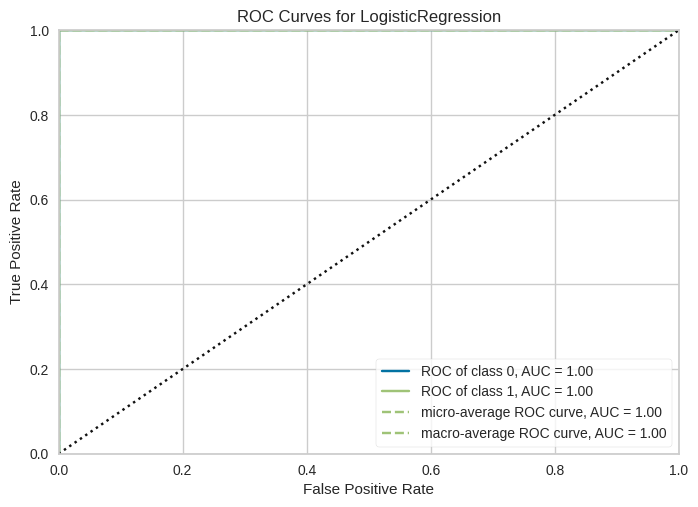

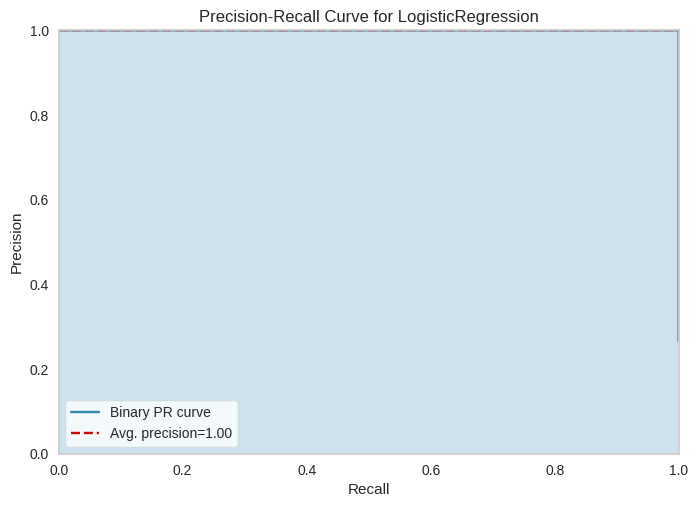

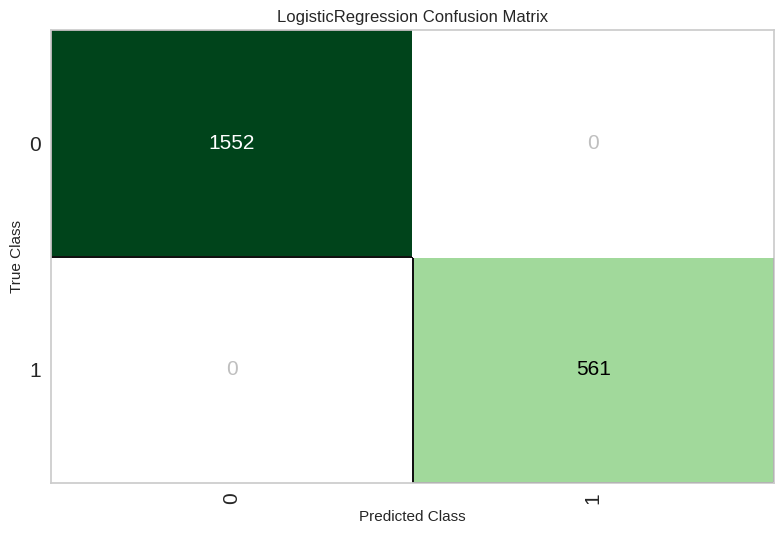

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Count', 'Country', 'State',
                                              'City', 'Zip Code', 'Lat Long',
                                              'Latitude', 'Longitude', 'Gender',
                                              'Tenure Months', 'Multiple Lines',
                                              'Internet Service',
                                              'Online Security', 'Online Backup',
                                              'Device Protection',
                                              'Tech Support', 'Streaming TV',
                                              'Streaming Movies', 'Contract',
                                              '...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(ma

In [ ]:
from pycaret.classification import setup, compare_models, save_model, plot_model, evaluate_model
import pandas as pd

# Example: df already loaded with a 'Churn Label' target column

# 1️⃣ Set up the PyCaret classification environment
clf_setup = setup(
    data=df,
    target='Churn Value',    # your target column
    session_id=123,          # reproducibility
    normalize=True,          # optional
    categorical_features=df.select_dtypes(include=['object', 'bool']).columns.tolist(),
    ignore_features=['CustomerID'],  # non-predictive
    use_gpu=False,
           # skip interactive prompts
)

# 2️⃣ Compare all models and pick the best
best_model = compare_models()

# 3️⃣ Evaluate the best model interactively (optional GUI)
# evaluate_model(best_model)   # uncomment for PyCaret's interactive dashboard

# 4️⃣ Plot ROC curve
plot_model(best_model, plot='auc')  # 'auc' = ROC curve

# 5️⃣ Plot Precision-Recall curve
plot_model(best_model, plot='pr')   # 'pr' = Precision-Recall curve

# 6️⃣ Plot Confusion Matrix
plot_model(best_model, plot='confusion_matrix')

# 7️⃣ Save the best model
save_model(best_model, 'best_churn_model')


In [ ]:
print(best_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


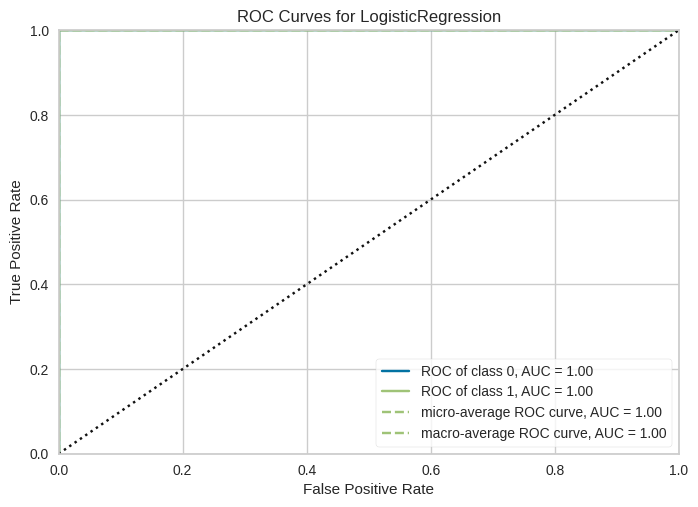

In [ ]:
# 4️⃣ Plot ROC curve
plot_model(best_model, plot='auc')

In [ ]:
df.shape


(7043, 37)

In [ ]:
df['Churn Value'].unique()

<IntegerArray>
[0, 1]
Length: 2, dtype: Int64